In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
import seaborn as sb # optional to set plot theme
sb.set_theme() # optional to set plot theme
!pip3 install yfinance
import yfinance as yf

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     ---- -------------------------------- 41.0/314.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 4.8 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -------- ------------------------------- 0.6/3.0 MB 12.4 MB/s eta 0:00:01
 

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_theme()

In [ ]:

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

In [ ]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    

1. get_data: this method should make use of a free stock data API (you might try the Python library yfinanceLinks to an external site.) to download historical price data based on user defined stock symbol and starting date and end date in ISO format (these should default to the last year of historical as of today’s close. The data should then be stored in a pandas DataFrame. The index of the DataFrame should be set to the date, and converted to a pandas Datetime object.

In [ ]:
def get_data(self):
        # Install yfinance if not already installed
        get_ipython().system('pip3 install yfinance')

        # Use yfinance to download data
        import yfinance as yf
        data = yf.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data

2.calc_returns: this method is a “helper” method called by get_data. It should enrich the DataFrame created with get_data with:
change column – the difference between the close to close price relative to the previous day’s close
instant_return – the daily instantaneous rate of return (np.log([closing_price]).diff().round(4))

In [ ]:
 def calc_returns(self, df):
        df['change'] = df['Close'].diff()
        df['instant_return'] = np.log(df['Close']).diff().round(4)

3.plot_return_dist: plot a well formatted histogram of the instantaneous returns

In [ ]:

    def plot_return_dist(self):
        plt.figure(figsize=(10, 6))
        plt.hist(self.data['instant_return'], bins=50)
        plt.title('Instantaneous Returns Distribution')
        plt.xlabel('Return')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

4.plot_performance: plot a well formatted line graph of the stock’s performance over the range of data collected, as a percent gain/loss

In [ ]:

    def plot_performance(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['Close'], label='Closing Price')
        plt.title(f'{self.symbol} Stock Performance')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()


Test your class:

instantiate a test object
access the data attribute
generate the two plots

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.386612   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505295   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893890   
2023-02-17  152.350006  153.000000  150.850006  152.550003  151.740067   
2023-02-21  150.199997  151.300003  148.410004  148.479996  147.691666   
...                ...         ...         ...         ...         ...   
2024-02-07  190.639999  191.050003  188.610001  189.410004  189.168625   
2024-02-08  189.389999  189.539993  187.350006  188.320007  188.080017   
2024-02-09  188.649994  189.990005  188.000000  188.850006  188.850006   
2024-02-12  188.419998  188.669998  186.789993  187.149994  187.149994   
2024-02-13  185.770004  186.210007  183.509995  185.039993  185.039993   

              Volume    change  insta

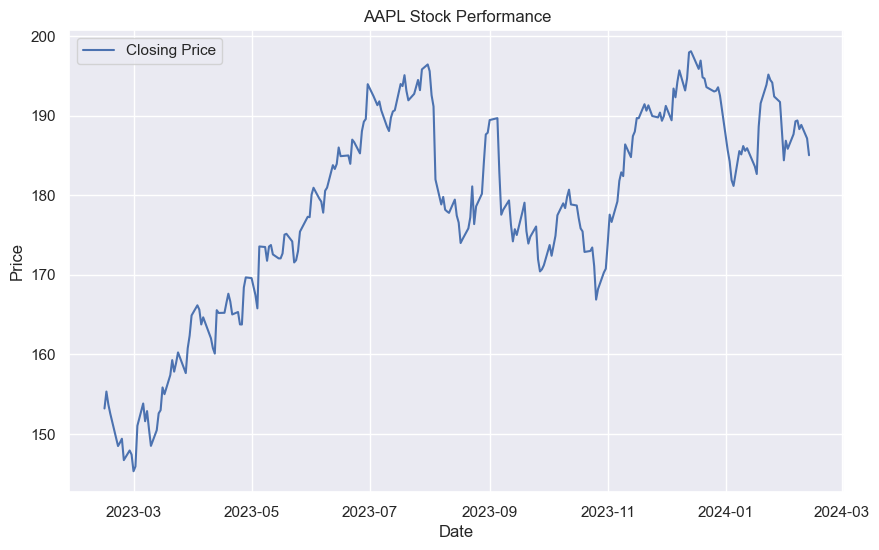

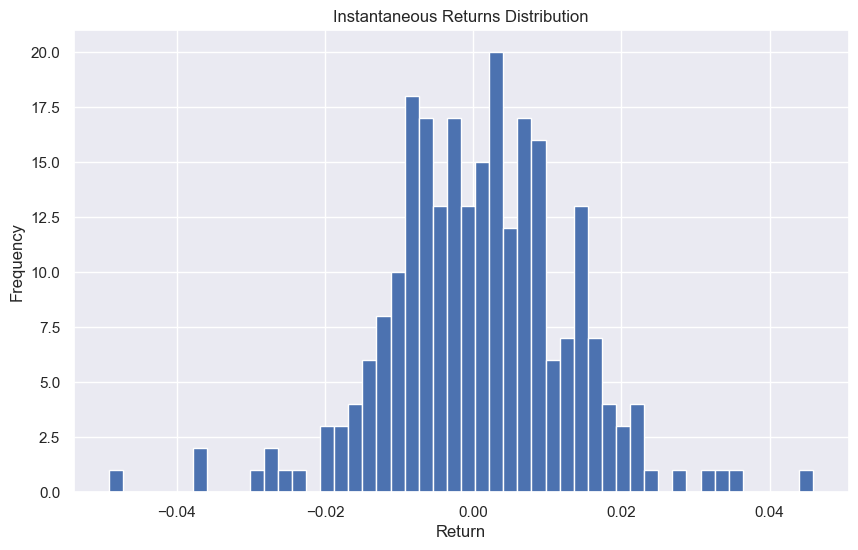

In [3]:

def main():
    # Test the Stock class
    stock_symbol = 'AAPL'  # Replace with the stock symbol you want to analyze
    test = Stock(stock_symbol)
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()


if __name__ == '__main__':
    main()
